# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 5. Advanced topics on handling collections

## Vectorizing your code using broadcasting

### Syntax and meaning of broadcasting in Julia

In [1]:
x = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [2]:
y = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [3]:
x * y

1-element Vector{Int64}:
 14

In [4]:
a = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
b = [4, 5, 6]

3-element Vector{Int64}:
 4
 5
 6

In [6]:
a * b

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at C:\WORK\julia-1.7.3\share\julia\base\operators.jl:655
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at C:\WORK\julia-1.7.3\share\julia\stdlib\v1.7\LinearAlgebra\src\matmul.jl:44
[0m  *(::StridedVecOrMat, [91m::LinearAlgebra.Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m) at C:\WORK\julia-1.7.3\share\julia\stdlib\v1.7\LinearAlgebra\src\lq.jl:266
[0m  ...

In [7]:
a .* b

3-element Vector{Int64}:
  4
 10
 18

In [8]:
map(*, a, b)

3-element Vector{Int64}:
  4
 10
 18

In [9]:
[a[i] * b[i] for i in eachindex(a, b)]

3-element Vector{Int64}:
  4
 10
 18

In [10]:
eachindex(a, b)

Base.OneTo(3)

In [11]:
eachindex([1, 2, 3], [4, 5])

LoadError: DimensionMismatch("all inputs to eachindex must have the same indices, got Base.OneTo(3) and Base.OneTo(2)")

In [12]:
map(*, [1, 2, 3], [4, 5])

2-element Vector{Int64}:
  4
 10

In [13]:
[1, 2, 3] .* [4, 5]

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 3 and 2")

### Expansion of length-1 dimensions in broadcasting

In [14]:
[1, 2, 3] .^ [2]

3-element Vector{Int64}:
 1
 4
 9

In [15]:
[1, 2, 3] .^ 2

3-element Vector{Int64}:
 1
 4
 9

In [16]:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] .* [1 2 3 4 5 6 7 8 9 10]

10×10 Matrix{Int64}:
  1   2   3   4   5   6   7   8   9   10
  2   4   6   8  10  12  14  16  18   20
  3   6   9  12  15  18  21  24  27   30
  4   8  12  16  20  24  28  32  36   40
  5  10  15  20  25  30  35  40  45   50
  6  12  18  24  30  36  42  48  54   60
  7  14  21  28  35  42  49  56  63   70
  8  16  24  32  40  48  56  64  72   80
  9  18  27  36  45  54  63  72  81   90
 10  20  30  40  50  60  70  80  90  100

In [17]:
["x", "y"] .=> [sum minimum maximum]

2×3 Matrix{Pair{String}}:
 "x"=>sum  "x"=>minimum  "x"=>maximum
 "y"=>sum  "y"=>minimum  "y"=>maximum

In [18]:
left_matrix = ["x" "x" "x"
               "y" "y" "y"]

2×3 Matrix{String}:
 "x"  "x"  "x"
 "y"  "y"  "y"

In [19]:
right_matrix = [sum minimum maximum
                sum minimum maximum]

2×3 Matrix{Function}:
 sum  minimum  maximum
 sum  minimum  maximum

In [20]:
left_matrix .=> right_matrix

2×3 Matrix{Pair{String}}:
 "x"=>sum  "x"=>minimum  "x"=>maximum
 "y"=>sum  "y"=>minimum  "y"=>maximum

In [21]:
abs.([1, -2, 3, -4])

4-element Vector{Int64}:
 1
 2
 3
 4

In [22]:
abs([1, 2, 3])

LoadError: MethodError: no method matching abs(::Vector{Int64})
[0mClosest candidates are:
[0m  abs([91m::Unsigned[39m) at C:\WORK\julia-1.7.3\share\julia\base\int.jl:179
[0m  abs([91m::Signed[39m) at C:\WORK\julia-1.7.3\share\julia\base\int.jl:180
[0m  abs([91m::Complex[39m) at C:\WORK\julia-1.7.3\share\julia\base\complex.jl:277
[0m  ...

In [23]:
string(1, 2, 3)

"123"

In [24]:
string.("x", 1:10)

10-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"

In [25]:
f(i::Int) = string("got integer ", i)

f (generic function with 1 method)

In [26]:
f(s::String) = string("got string ", s)

f (generic function with 2 methods)

In [27]:
f.([1, "1"])

2-element Vector{String}:
 "got integer 1"
 "got string 1"

### Protection of collections from being broadcasted over

In [28]:
in(1, [1, 2, 3])

true

In [29]:
in(4, [1, 2, 3])

false

In [30]:
1 in [1, 2, 3]

true

In [31]:
4 in [1, 2, 3]

false

In [32]:
in([1, 3, 5, 7, 9], [1, 2, 3, 4])

false

In [33]:
in([1, 3, 5, 7, 9], [1, 2, 3, 4, [1, 3, 5, 7, 9]])

true

In [34]:
in.([1, 3, 5, 7, 9], [1, 2, 3, 4])

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 5 and 4")

In [35]:
in.([1, 3, 5, 7, 9], Ref([1, 2, 3, 4]))

5-element BitVector:
 1
 1
 0
 0
 0

### Display of boolean matrices

In [36]:
isodd.([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] .* [1 2 3 4 5 6 7 8 9 10])

10×10 BitMatrix:
 1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0

In [37]:
Matrix{Any}(isodd.([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] .*
[1 2 3 4 5 6 7 8 9 10]))

10×10 Matrix{Any}:
  true  false   true  false   true  false   true  false   true  false
 false  false  false  false  false  false  false  false  false  false
  true  false   true  false   true  false   true  false   true  false
 false  false  false  false  false  false  false  false  false  false
  true  false   true  false   true  false   true  false   true  false
 false  false  false  false  false  false  false  false  false  false
  true  false   true  false   true  false   true  false   true  false
 false  false  false  false  false  false  false  false  false  false
  true  false   true  false   true  false   true  false   true  false
 false  false  false  false  false  false  false  false  false  false

### Analyzing Anscombe's quartet data using broadcasting

In [38]:
using Statistics
aq = [10.0  8.04 10.0  9.14 10.0  7.46  8.0  6.58
       8.0  6.95  8.0  8.14  8.0  6.77  8.0  5.76
      13.0  7.58 13.0  8.74 13.0 12.74  8.0  7.71
       9.0  8.81  9.0  8.77  9.0  7.11  8.0  8.84
      11.0  8.33 11.0  9.26 11.0  7.81  8.0  8.47
      14.0  9.96 14.0  8.1  14.0  8.84  8.0  7.04
       6.0  7.24  6.0  6.13  6.0  6.08  8.0  5.25
       4.0  4.26  4.0  3.1   4.0  5.39 19.0 12.50
      12.0 10.84 12.0  9.13 12.0  8.15  8.0  5.56
       7.0  4.82  7.0  7.26  7.0  6.42  8.0  7.91
       5.0  5.68  5.0  4.74  5.0  5.73  8.0  6.89]

11×8 Matrix{Float64}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [39]:
mean.(eachcol(aq))

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [40]:
mean(eachcol(aq))

11-element Vector{Float64}:
  8.6525
  7.4525
 10.47125
  8.56625
  9.35875
 10.492500000000001
  6.3375
  7.03125
  9.71
  6.92625
  5.755000000000001

In [41]:
function R²(x, y)
    X = [ones(11) x]
    model = X \ y
    prediction = X * model
    error = y - prediction
    SS_res = sum(v -> v ^ 2, error)
    mean_y = mean(y)
    SS_tot = sum(v -> (v - mean_y) ^ 2, y)
    return 1 - SS_res / SS_tot
end

R² (generic function with 1 method)

If we wanted to use broadcasting, we could write:

In [42]:
function R2(x, y)
    X = [ones(11) x]
    model = X \ y
    prediction = X * model
    SS_res = sum((y .- prediction) .^ 2)
    SS_tot = sum((y .- mean(y)) .^ 2)
    return 1 - SS_res / SS_tot
end

R2 (generic function with 1 method)

As you can see, we have changed formulas for `SS_res` and `SS_tot`. In both cases we
have used the dot (`.`) twice. For example, in `(y .- prediction) .^ 2` we are broadcasting
both subtraction and exponentiation.

#### Efficiency of broadcasting in Julia
**If Julia
encounters several broadcasting operations in a single expression, it
performs it in one pass without allocating any intermediate objects**. This is called **broadcast fusion** and improves the performance of
broadcasted operations. Broadcast fusion can be efficient because Julia compiles your program as a whole.

If you would like to learn more how this feature of the Julia language works, I recommend
you start with [this blog post](https://julialang.org/blog/2018/05/extensible-broadcast-fusion/).

## Defining methods with parametric types

### Most collection types in Julia are parametric

In [43]:
[]

Any[]

In [44]:
Dict()

Dict{Any, Any}()

We have created an empty vector and an empty dictionary. They can store any value, which is signaled by the `Any` parameter.
With vectors you can specify their element type by prefixing the opening square bracket with the type:

In [45]:
Float64[1, 2, 3]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

Although we have entered 1, 2, and 3 as integers they got converted to `Float64`
because we requested that the resulting vector should contain such values.
Similarly for dictionary we can write:

In [46]:
Dict{UInt8, Float64}(0 => 0, 1 => 1)

Dict{UInt8, Float64} with 2 entries:
  0x00 => 0.0
  0x01 => 1.0

As you can see, we have forced the conversion of both keys and values to `UInt8` and
`Float64` types respectively. Julia prints unsigned integers with
`0x` prefix, and the shown values are using hexadecimal representation. For example, let us
specify an explicit conversion from `Int` to `UInt32`:

In [47]:
UInt32(200)

0x000000c8

As a last example below, I create a vector that can store any `Real` value:

In [48]:
Real[1, 1.0, 0x3]

3-element Vector{Real}:
    1
    1.0
 0x03

This time no conversion of stored values happened as `Int`, `Float64` and `UInt8`
types are subtypes of `Real`. To check this run:

In [49]:
typeof.(Real[1, 1.0, 0x3])

3-element Vector{DataType}:
 Int64
 Float64
 UInt8

Before we move forward let me introduce the `eltype` function. This function allows us to
extract the type of elements that some collection can store. Here are a few examples:

In [50]:
v1 = Any[1, 2, 3]

3-element Vector{Any}:
 1
 2
 3

In [51]:
eltype(v1)

Any

In [52]:
v2 = Float64[1, 2, 3]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [53]:
eltype(v2)

Float64

In [54]:
v3 = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [55]:
eltype(v3)

Int64

In [56]:
d1 = Dict()

Dict{Any, Any}()

In [57]:
eltype(d1)

Pair{Any, Any}

In [58]:
d2 = Dict(1 => 2, 3 => 4)

Dict{Int64, Int64} with 2 entries:
  3 => 4
  1 => 2

In [59]:
eltype(d2)

Pair{Int64, Int64}

For vectors we just get the type, while for dictionaries we get a `Pair` type since, as we
have already discussed, in Julia the key–value combination has a `Pair` type:

In [60]:
p = 1 => 2

1 => 2

In [61]:
typeof(p)

Pair{Int64, Int64}

### Rules for subtyping of parametric types

In [62]:
[1, 2, 3] isa AbstractVector{Int}

true

In [63]:
[1, 2, 3] isa AbstractVector{Real}

false

In [64]:
AbstractVector{<:Real} == AbstractVector{T} where T<:Real

true

### Using subtyping rules to define the covariance function

In [65]:
using Statistics
function ourcov(x::AbstractVector{<:Real}, y::AbstractVector{<:Real})
    len = length(x)
    @assert len == length(y) > 0
    return sum((x .- mean(x)) .* (y .- mean(y))) / (len - 1)
end

ourcov (generic function with 1 method)

In [66]:
ourcov(1:4, [1.0, 3.0, 2.0, 4.0])

1.3333333333333333

In [67]:
cov(1:4, [1.0, 3.0, 2.0, 4.0])

1.3333333333333333

In [68]:
ourcov(1:4, Any[1.0, 3.0, 2.0, 4.0])

LoadError: MethodError: no method matching ourcov(::UnitRange{Int64}, ::Vector{Any})
[0mClosest candidates are:
[0m  ourcov(::AbstractVector{<:Real}, [91m::AbstractVector{<:Real}[39m) at In[65]:2

### Autodetection of narrowest element type

In [69]:
x = Any[1, 2, 3]

3-element Vector{Any}:
 1
 2
 3

In [70]:
identity.(x)

3-element Vector{Int64}:
 1
 2
 3

In [71]:
y = Any[1, 2.0]

2-element Vector{Any}:
 1
 2.0

In [72]:
identity.(y)

2-element Vector{Real}:
 1
 2.0

## Integration with Python

### Preparing data for dimensionality reduction

In [73]:
using Random
Random.seed!(1234);
cluster1 = randn(100, 5) .- 1

100×5 Matrix{Float64}:
 -0.0293437  -0.737544   -0.613869  -1.31815    -2.95335
 -1.97922    -1.02224    -1.74252   -2.33397    -2.00848
 -0.0981391  -1.39129    -1.87533   -1.76821    -1.23108
 -1.0328     -0.972379    0.600607  -0.0713489  -1.16386
 -1.60079    -3.29076     0.521804   1.71145    -0.113714
 -2.44518    -1.66854    -0.715754  -1.37086     0.630318
  1.70742    -1.78469    -1.87393   -1.44342     0.521595
  0.524448    0.128985   -1.8989    -1.20746    -0.417508
 -0.240196   -0.788823   -1.16236   -0.0609412  -0.30224
 -1.88144    -0.285358   -0.382139  -1.26819    -1.58575
 -0.294007   -0.965934   -0.890225  -2.73204    -2.00704
  0.0915553  -0.431329   -0.896389  -1.78917    -3.25478
 -0.128502   -3.62623    -2.29636   -2.58389    -1.03068
  ⋮                                             
  0.349637   -1.35364    -1.89788    0.600061    0.371505
  0.131929   -0.868554   -0.737022  -1.75019    -1.40852
 -2.3637     -1.03082    -1.12565   -2.20938    -0.321452
 -1.06856 

In [74]:
cluster2 = randn(100, 5) .+ 1

100×5 Matrix{Float64}:
  0.910428    2.13668    0.852595   -0.450324    0.279842
 -0.203334    0.993725   1.86318     0.410499   -0.0472934
 -0.310062    0.608036  -0.0537928   1.48085     1.51439
  1.57447     1.40369    1.44851     1.27623     0.942008
  2.16312     1.88732    2.51227     0.533175   -0.520495
 -0.297068   -0.294909   1.69599    -0.955542    0.460474
  0.326462    1.73068   -0.107294   -0.173673    2.16299
  2.06125     1.23118    2.39091     1.94137     0.99571
  2.04321     0.655377   0.752083    1.51127    -1.03125
  1.50997     0.53043    0.855706    1.14648    -0.473419
  0.283238    1.66014    1.30692     1.63794     2.61739
 -0.194558    1.54699    0.929476   -1.25768     1.16355
  0.852959    3.43833    0.209476    0.0278118   0.657448
  ⋮                                             
  1.745       0.264627  -0.48647     1.7736      1.85603
  1.92047     1.90824    1.80222    -1.18045     1.08781
  0.0598871   0.375741  -0.0903753  -0.0878099   3.18596
  0.3411

In [75]:
data5 = vcat(cluster1, cluster2)

200×5 Matrix{Float64}:
 -0.0293437  -0.737544  -0.613869   -1.31815    -2.95335
 -1.97922    -1.02224   -1.74252    -2.33397    -2.00848
 -0.0981391  -1.39129   -1.87533    -1.76821    -1.23108
 -1.0328     -0.972379   0.600607   -0.0713489  -1.16386
 -1.60079    -3.29076    0.521804    1.71145    -0.113714
 -2.44518    -1.66854   -0.715754   -1.37086     0.630318
  1.70742    -1.78469   -1.87393    -1.44342     0.521595
  0.524448    0.128985  -1.8989     -1.20746    -0.417508
 -0.240196   -0.788823  -1.16236    -0.0609412  -0.30224
 -1.88144    -0.285358  -0.382139   -1.26819    -1.58575
 -0.294007   -0.965934  -0.890225   -2.73204    -2.00704
  0.0915553  -0.431329  -0.896389   -1.78917    -3.25478
 -0.128502   -3.62623   -2.29636    -2.58389    -1.03068
  ⋮                                             
  1.745       0.264627  -0.48647     1.7736      1.85603
  1.92047     1.90824    1.80222    -1.18045     1.08781
  0.0598871   0.375741  -0.0903753  -0.0878099   3.18596
  0.341124  

### Calling Python from Julia

In [76]:
using PyCall
manifold = pyimport("sklearn.manifold")

PyObject <module 'sklearn.manifold' from 'C:\\Users\\bogum\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\manifold\\__init__.py'>

In [77]:
tsne = manifold.TSNE(n_components=2, init="random",
                     learning_rate="auto", random_state=1234)

PyObject TSNE(init='random', learning_rate='auto', random_state=1234)

In [78]:
data2 = tsne.fit_transform(data5)

200×2 Matrix{Float32}:
  1.25395   -14.9826
  0.448442  -12.2407
 -2.0488    -10.6652
  2.19538    -3.94876
  3.96208    -4.52406
  5.36888    -8.49391
 -4.42427    -6.51206
 -2.90912    -7.07276
 -0.748511   -6.07825
  3.50201   -12.5633
 -0.820911  -13.45
  0.720357  -15.1307
 -5.75896   -11.0336
  ⋮         
  3.06928    12.287
 -5.0805     14.7614
  5.6529      7.01109
 -2.95191    10.3881
  3.05986     8.38205
 -2.45138     7.67155
  2.11289     8.53137
 -0.722965    7.74772
  6.23544    10.1046
  5.49633     6.37504
 -1.82243    13.8231
  5.05417    13.2529

### Visualizing the results of t-SNE algorithm

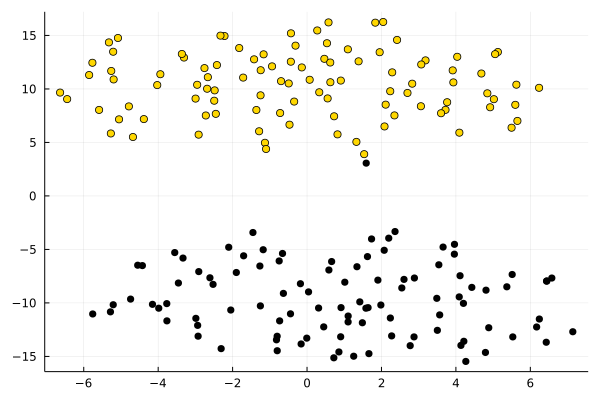

In [79]:
using Plots
scatter(data2[:, 1], data2[:, 2]; color=[fill("black", 100); fill("gold", 100)], legend=false)